In [ ]:
from google.colab import files
uploaded_csv = files.upload() 

Saving Golden_Ticket_Award_Winners_Wood.csv to Golden_Ticket_Award_Winners_Wood.csv


In [ ]:
import pandas as pd
import io
rc_wood = pd.read_csv(io.BytesIO(uploaded_csv['Golden_Ticket_Award_Winners_Wood.csv']))
rc_wood

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
...,...,...,...,...,...,...,...,...
175,46,Megafobia,Oakwood,"Pembrookshire, Wales",Custom Coasters,1996,84,2018
176,47,Hades 360,Mount Olympus,"Wisconsin Dells, Wis.",Gravity Group,2005,80,2018
177,48,Mine Blower,Fun Spot,"Kissimmee, Fla.",Gravity Group,2017,79,2018
178,49,Wooden Warrior,Quassy Amusement Park,"Meddlebury, Conn.",Gravity Group,2011,77,2018


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def evaluation_for_one_rc(rc, park, df):
  ranks = df[(df['Name'] == rc) & (df['Park'] == park)]
  plt.figure(figsize=(10, 8))
  plt.plot(ranks['Year of Rank'], ranks['Points'])
  ax = plt.subplot()
  ax.set_xticks(ranks['Year of Rank'].values)
  ax.set_yticks(ranks['Points'].values)
  ax.invert_yaxis()
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


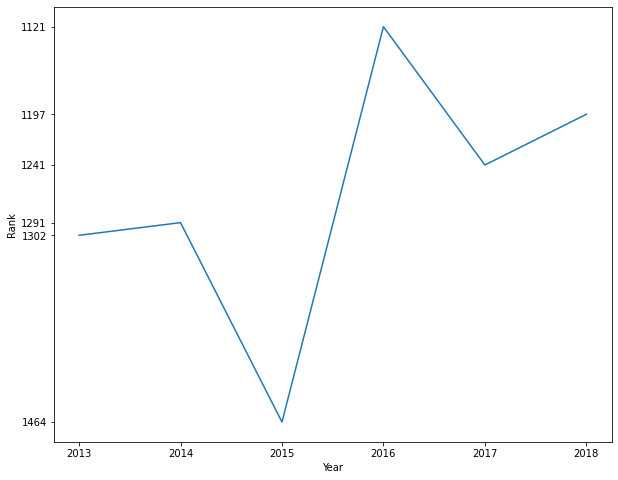

<Figure size 432x288 with 0 Axes>

In [ ]:
evaluation_for_one_rc('El Toro', 'Six Flags Great Adventure', rc_wood)
plt.clf()

In [ ]:
def evaluation_for_two_rc(rc_1, park_1, rc_2, park_2, df):
  rankings_1 = df[(df['Name'] == rc_1) & (df['Park'] == park_1)]
  rankings_2 = df[(df['Name'] == rc_2) & (df['Park'] == park_2)]
  plt.figure(figsize=(10, 8))
  plt.plot(rankings_1['Year of Rank'], rankings_1['Points'], color='red')
  plt.plot(rankings_2['Year of Rank'], rankings_2['Points'], color='green')
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.legend([rc_1, rc_2])
  plt.show()

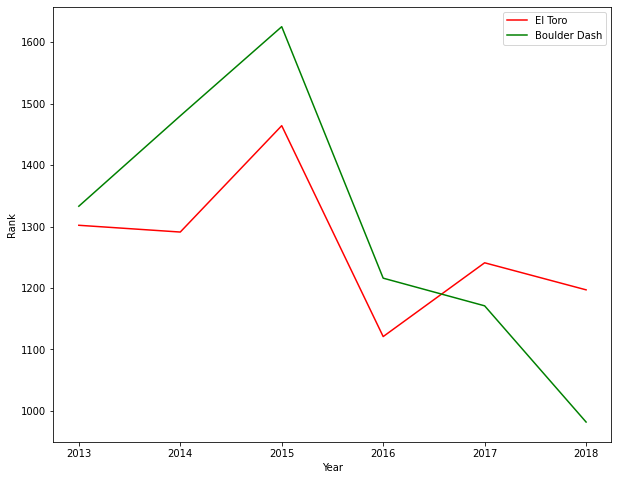

<Figure size 432x288 with 0 Axes>

In [ ]:
evaluation_for_two_rc('El Toro', 'Six Flags Great Adventure','Boulder Dash', 'Lake Compounce' ,rc_wood)
plt.clf()

In [ ]:
def plot_n_roller_coasters(df, n):
  n_ranks = df[df['Rank'] <= n]
  plt.figure(figsize=(10, 8))
  for rc in set(n_ranks['Name']):
    rc_ranks = n_ranks[n_ranks['Name'] == rc]
    plt.plot(rc_ranks['Year of Rank'],rc_ranks['Rank'],label=rc)
  plt.title("Top Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

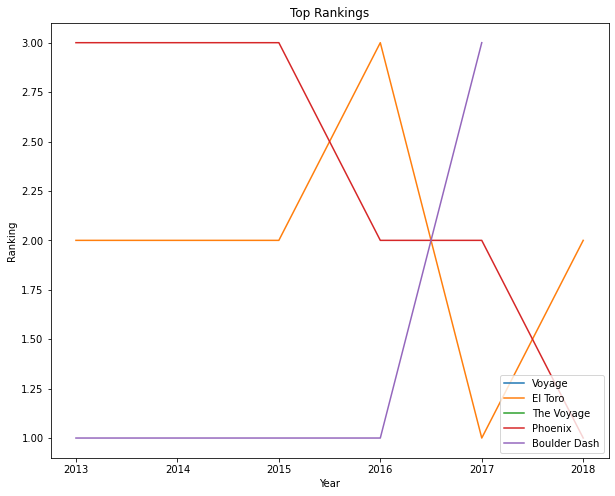

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_n_roller_coasters(rc_wood, 3)
plt.clf()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving roller_coasters.csv to roller_coasters.csv


In [ ]:
import io
rc_df2 = pd.read_csv(io.BytesIO(uploaded['roller_coasters.csv']))
rc_df2

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating
...,...,...,...,...,...,...,...,...,...,...
2797,Dragon Challenge,Steel,Sit Down,NaN,NaN,NaN,0.0,Pinfari,Barry Island Pleasure Park,status.operating
2798,Wild Mouse,Steel,Spinning,NaN,NaN,NaN,0.0,Reverchon,Barry Island Pleasure Park,status.operating
2799,Unnamed Atlantica Supersplash Clone,Steel,Sit Down,80.0,30.0,390.0,0.0,Mack,Le Pal,status.announced
2800,Unknown Duelling Launch Coaster,Steel,na,NaN,NaN,NaN,0.0,na,Universal's Epic Universe,status.rumored


In [ ]:
# function to plot histogram of column numeric values
def plot_histogram(df, column):
  plt.hist(df[column].dropna())
  plt.title('Distrubution of RC {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.show()

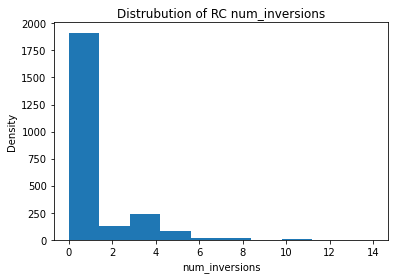

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_histogram(rc_df2, 'num_inversions')
plt.clf()

In [ ]:
# function to plot inversions by coaster at park
def plot_inversions_by_coaster(df, park_name):
  park_coasters = df[df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  plt.bar(range(len(number_inversions)),number_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)
  plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
  plt.xlabel('Roller Coaster')
  plt.ylabel('Number of Inversions')
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


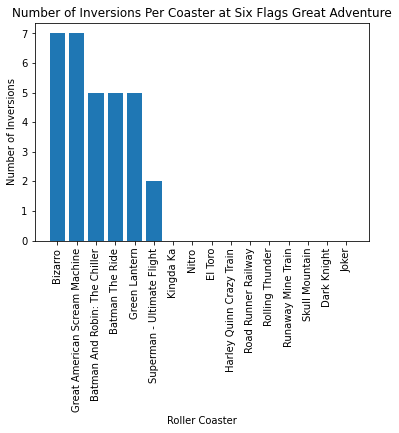

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_inversions_by_coaster(rc_df2, 'Six Flags Great Adventure')
plt.clf()

In [ ]:
# function to plot pie chart of operating status
def pie_chart_status(df):
  operating_rc = df[df['status'] == 'status.operating']
  closed_rc = df[df['status'] == 'status.closed.definitely']
  num_operating_rc = len(operating_rc)
  num_closed_rc = len(closed_rc)
  status_counts = [num_operating_rc,num_closed_rc]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
  plt.axis('equal')
  plt.show()

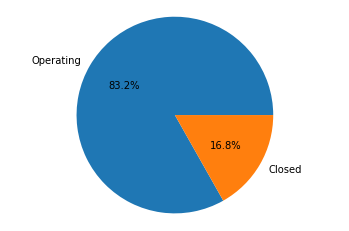

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_chart_status(rc_df2)
plt.clf()

In [ ]:
# function to plot scatter of two numeric columns
def plot_scatter(df, col_x, col_y):
  plt.scatter(df[col_x], df[col_y])
  plt.title('Scatter Plot of {} - {}'.format(col_y,col_x))
  plt.xlabel(col_x)
  plt.ylabel(col_y)
  plt.show()

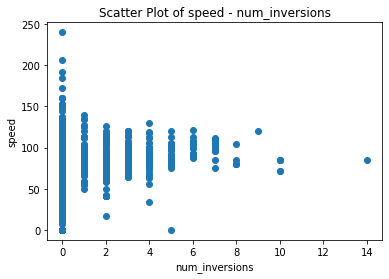

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_scatter(rc_df2, 'num_inversions', 'speed')
plt.clf()